In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import os
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pickle
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

from keras.optimizers import Adam
from keras import applications
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

# this function is used to update the plots for each epoch and error
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()
    
    

C:\Users\santosh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1]:
import joblib
x_train=joblib.load('X_train80.joblib')

x_test=joblib.load('X_test20.joblib')

y_train=joblib.load('y_train80.joblib')

y_test=joblib.load('y_test20.joblib')

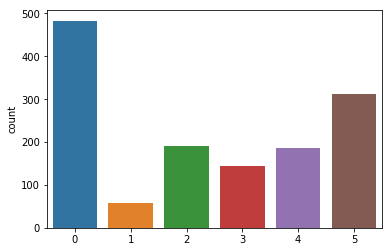

In [4]:
sns.countplot(y_train)

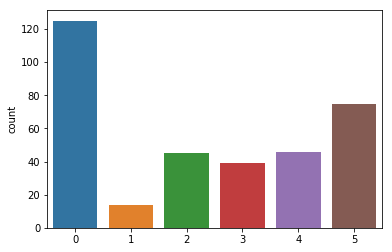

In [5]:
sns.countplot(y_test)

In [3]:
num_classes=6

x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (1376, 224, 224, 3)
1376 train samples
344 test samples


In [5]:
#image_input = Input(shape=(224, 224, 3))
from keras.applications import ResNet50
model = ResNet50(weights='imagenet',include_top=False)
#model.summary()
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dense(256, activation='relu',name='fc-2')(x)
# a sigmoid layer for 2 classes
out = Dense(6, activation='softmax',name='output_layer')(x)

# this is the model we will train


C:\Users\santosh\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [6]:
import time
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

#custom_resnet_model2.summary()

for layer in custom_resnet_model2.layers[:-6]:
	layer.trainable = False

custom_resnet_model2.layers[-6].trainable

custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model2.fit(x_train, y_train, batch_size=32, epochs=300, verbose=0, validation_data=(x_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model2.evaluate(x_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


Training time: -3069.6037499904633
344/344 [==============================] - ETA: 2: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 53 - ETA: 47 - ETA: 40 - ETA: 34 - ETA: 29 - ETA: 23 - ETA: 17 - ETA: 12 - ETA: 7 - ETA:  - 176s 513ms/step
[INFO] loss=0.7045, accuracy: 71.1240%


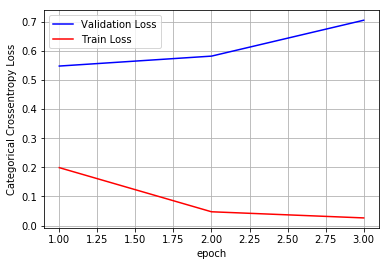

In [8]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,3+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

In [9]:
base_model=MobileNet(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.35)(x)
x=Dense(256,activation='relu')(x) 
x=Dropout(0.25)(x)
x=Dense(128,activation='relu')(x) 
preds=Dense(6,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds)
for layer in model.layers[:17]:
    layer.trainable=False
for layer in model.layers[17:]:
    layer.trainable=True
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\santosh\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [12]:
hist=model.fit(x_train,y_train,epochs=3,batch_size=28,validation_split=0.3,verbose=1)

Train on 963 samples, validate on 413 samples
Epoch 1/3
963/963 [==============================] - ETA: 23:46 - loss: 2.1345 - acc: 0.14 - ETA: 17:58 - loss: 1.9217 - acc: 0.26 - ETA: 15:50 - loss: 1.7805 - acc: 0.29 - ETA: 14:32 - loss: 1.7331 - acc: 0.33 - ETA: 13:35 - loss: 1.5914 - acc: 0.40 - ETA: 12:48 - loss: 1.4581 - acc: 0.45 - ETA: 12:11 - loss: 1.3493 - acc: 0.50 - ETA: 11:35 - loss: 1.2605 - acc: 0.54 - ETA: 11:03 - loss: 1.1870 - acc: 0.56 - ETA: 10:33 - loss: 1.0997 - acc: 0.59 - ETA: 10:01 - loss: 1.0461 - acc: 0.61 - ETA: 9:32 - loss: 0.9838 - acc: 0.6399 - ETA: 9:02 - loss: 0.9484 - acc: 0.651 - ETA: 8:35 - loss: 0.9141 - acc: 0.663 - ETA: 8:10 - loss: 0.8689 - acc: 0.681 - ETA: 7:44 - loss: 0.8252 - acc: 0.696 - ETA: 7:20 - loss: 0.7892 - acc: 0.710 - ETA: 6:57 - loss: 0.7528 - acc: 0.722 - ETA: 6:32 - loss: 0.7332 - acc: 0.731 - ETA: 6:05 - loss: 0.7111 - acc: 0.739 - ETA: 5:39 - loss: 0.6993 - acc: 0.743 - ETA: 5:13 - loss: 0.6950 - acc: 0.745 - ETA: 4:47 - loss: 0.

In [13]:
score=model.evaluate(x_test,y_test)


344/344 [==============================] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 53s - ETA: 43 - ETA: 34 - ETA: 25 - ETA: 15 - ETA: 6 - 96s 279ms/step


Test score: 2.672246212183043
Test accuracy: 0.42151162790697677


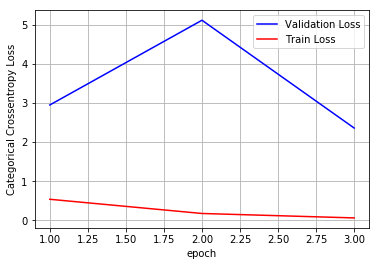

In [15]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,3+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()